In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 26.58 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
import os
base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(327).jpg', 'COVID19(284).jpg', 'COVID19(127).jpg', 'COVID-19 (336).jpg', 'COVID19(260).jpg', 'COVID-19 (2).png', 'COVID19(224).jpg', 'COVID-19 (27).jpeg', 'COVID19(430).jpg', 'COVID19(547).jpg']
['NORMAL(1172).jpg', 'NORMAL(533).jpg', 'NORMAL(90).jpg', 'NORMAL(160).jpg', 'NORMAL(718).jpg', 'NORMAL(916).jpg', 'NORMAL(1171).jpg', 'NORMAL(1577).jpg', 'NORMAL(47).jpg', 'NORMAL(1189).jpg']
['COVID19(483).jpg', 'COVID19(285).jpg', 'COVID19(177).jpg', 'COVID19(444).jpg', 'COVID-19 (745).jpg', 'COVID-19 (587).jpg', 'COVID19(410).jpg', 'COVID19(98).jpg', 'COVID19(463).jpg', 'COVID19(464).jpg']
['NORMAL(199).jpg', 'NORMAL(248).jpg', 'NORMAL(455).jpg', 'NORMAL(1359).jpg', 'NORMAL(236).jpg', 'NORMAL(1052).jpg', 'NORMAL(576).jpg', 'NORMAL(108).jpg', 'NORMAL(586).jpg', 'NORMAL(1190).jpg']


In [ ]:
print("train dataset covid images :", len(train_covid_names))
print("train dataset normal images :", len(train_normal_names))
print("test dataset covid images :", len(test_covid_names))
print("train dataset normal images :", len(test_normal_names))
print("Total train images :", len(train_covid_names+train_normal_names))
print("Total test images :", len(test_covid_names+test_normal_names))

train dataset covid images : 545
train dataset normal images : 1266
test dataset covid images : 167
train dataset normal images : 317
Total train images : 1811
Total test images : 484


['/content/datasets/Data/train/COVID19/COVID19(327).jpg', '/content/datasets/Data/train/COVID19/COVID19(284).jpg', '/content/datasets/Data/train/COVID19/COVID19(127).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (336).jpg', '/content/datasets/Data/train/COVID19/COVID19(260).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (2).png', '/content/datasets/Data/train/COVID19/COVID19(224).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (27).jpeg']
['/content/datasets/Data/train/NORMAL/NORMAL(1172).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(533).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(90).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(160).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(718).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(916).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1171).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1577).jpg']


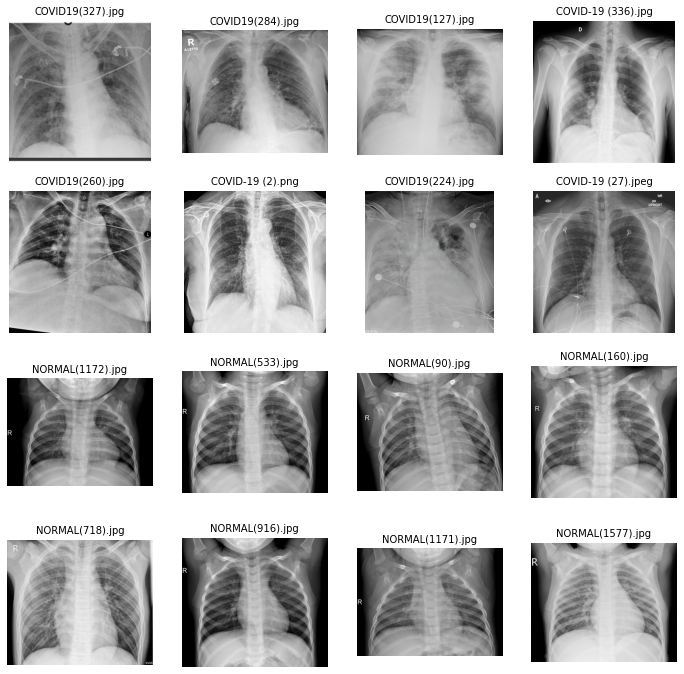

In [ ]:
#lets plot the grid of 16 images
import matplotlib.image as mpimg 

nrows = 4
ncols = 4

#setting the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic = [os.path.join(train_covid_dir, fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir, fname) for fname in train_normal_names[0:8]]

print(next_covid_pic)
print(next_normal_pic)

for i, img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap='gray')

plt.show()

## Generating Training, validation and testing batches!

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip= True)

validation_datagen = ImageDataGenerator( rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    subset='training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    subset='training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150, 150),
                                                    subset='training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')



Found 1449 images belonging to 2 classes.
Found 1449 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices
train_generator.image_shape

(150, 150, 3)

In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

## Building the Convolutional Neural Network Model

In [ ]:
model= Sequential()
model.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

## Compile and Train

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data= validation_generator,
                              validation_steps = 10)

Epoch 1/30
46/46 [==============================] - 151s 3s/step - loss: 2.8058 - accuracy: 0.6193 - val_loss: 0.4350 - val_accuracy: 0.8938
Epoch 2/30
46/46 [==============================] - 149s 3s/step - loss: 0.2960 - accuracy: 0.8933 - val_loss: 0.2476 - val_accuracy: 0.9281
Epoch 3/30
46/46 [==============================] - 147s 3s/step - loss: 0.1756 - accuracy: 0.9389 - val_loss: 0.1618 - val_accuracy: 0.9656
Epoch 4/30
46/46 [==============================] - 147s 3s/step - loss: 0.1626 - accuracy: 0.9442 - val_loss: 0.2236 - val_accuracy: 0.9563
Epoch 5/30
46/46 [==============================] - 148s 3s/step - loss: 0.1572 - accuracy: 0.9550 - val_loss: 0.1131 - val_accuracy: 0.9781
Epoch 6/30
46/46 [==============================] - 151s 3s/step - loss: 0.1411 - accuracy: 0.9499 - val_loss: 0.1455 - val_accuracy: 0.9531
Epoch 7/30
46/46 [==============================] - 147s 3s/step - loss: 0.1469 - accuracy: 0.9525 - val_loss: 0.0900 - val_accuracy: 0.9844
Epoch 8/30
46

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

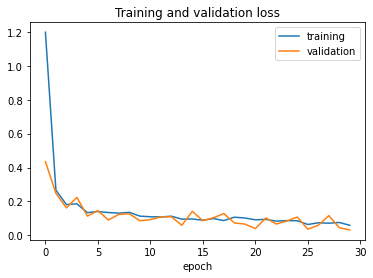

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

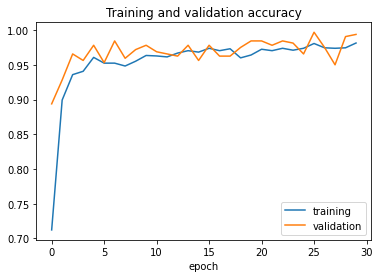

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

16/16 [==============================] - 19s 1s/step - loss: 0.0637 - accuracy: 0.9835
test acc :0.9834710955619812 test loss:0.06369741261005402


In [ ]:
#test your model with some images from your local computer to predict if they are covid positive or not
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img=image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes= model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
    print('Covid19')
  else:
    print('Normal')

Saving Screenshot 2021-05-23 at 1.37.27 PM.png to Screenshot 2021-05-23 at 1.37.27 PM.png
/content/Screenshot 2021-05-23 at 1.37.27 PM.png
Screenshot 2021-05-23 at 1.37.27 PM.png
Covid19
